# Table des matières

[Vérification de la présence de valeurs manquantes](#Vérification de la présence de valeurs manquantes) <br>
[Vérification de la presence de doublons](#Vérification de la presence de doublons) <br>
[Vérification de la présence de valeurs aberrantes](#Vérification de la présence de valeurs aberrantes)
- [Analyse des valeurs aberantes de la variable pop](#Analyse des valeurs aberantes de la variable pop) <br>

[Mission 1](#Mission 1)
- [Résumez les données utilisées](#Résumez les données utilisées) 
    - [Années des données utilisées](#Années des données utilisées)
    - [Nombre de pays présents](#Nombre de pays présents)
    - [Population couverte par l'analyse (en termes de pourcentage de la population mondiale)](#Pop)
- [Les données de la world income distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.](#qtiles) 
    - [ De quel type de quantiles s'agit-il (quartiles, déciles, etc.)](#question)
- [Donner des explications ](#explications) <br>

[Mission 2](#mission2)
- [Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique.](#diversite)
- [Représentez la courbe de Lorenz de chacun des pays choisis](#lorenz)
- [Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.](#gini)
- [Classez les pays par indice de Gini](#classement) <br>

[Mission 3](#mission3)
- [Récupération des données du fichier.txt sous la forme d'un dataframe](#recup)
- [Pour chaque valeur de ρj , générez un échantillon de valeurs yi distribuées selon une loi normale.](#generate)
- [Pour chacun des revenus enfants / parents, déterminez le quantile correspondant.](#qtile_parent)
- [Pour chaque individu de la Word Income Distribution, associez les quartiles enfants / parents qui conviennent.](#associate) <br>

[Mission 4](#mission4)
- [Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.](#anova)
- [Ajoutez maintenant comme variable explicative la classe de revenu des parents de l’individu (variable quantitative), ainsi que son pays (comme variable qualitative). Proposez un modèle et analysez-en les performances.](#ancova)
- [Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le revenu salaire moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?](#reg1)
- [Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?](#reg2)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import matplotlib
import seaborn as sns
import bokeh.plotting as bk
import bokeh.io as outbk
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
outbk.output_notebook() #Intégration des graphiques bokeh dans le notebook

Loading BokehJS ...

In [3]:
sys.path.append('../code')

In [4]:
import my_functions_revue_1_0 as mfct
import generate_sample as gensam

In [5]:
data = pd.read_csv('../fichiers_csv/world_income_distribution.csv')

In [6]:
def add_eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

In [7]:
def add_omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [8]:
def calc_anova(x,y,data):
    
    k = len(pd.unique(data[x]))  # nombre de groupes
    N = len(data.values)  # taille de l'échantillon
    n = data.groupby(x).size() # nb de valeurs par groupes
    
    #DF = Degré de liberté (Degree of Freedom)
    
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1

    moyenne_y = data[y].mean()

    classes = []

    for classe in data[x].unique():

        yi_classe = data[y][data[x]==classe]

        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean(),
                       'variance_classe': yi_classe.var(ddof=0)})

    SCT = sum([(yj-moyenne_y)**2 for yj in data[y]])

    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    SCR = sum([c['ni']*(c['variance_classe']) for c in classes])
    
    
   
    
    
    MSbetween = SCE/DFbetween
    MSwithin = SCR/DFwithin
    F_value = MSbetween/MSwithin
    p_value = stats.f.sf(F_value, DFbetween, DFwithin)
    
    resultat = dict({'SCE':round(SCE,3),'SCT':round(SCT,3),'SCR':round(SCR,3),'eta_squared':round(SCE/SCT,3),'Valeur_F':F_value,'P-valeur':p_value})


    return resultat

<a id='Vérification de la présence de valeurs manquantes'></a>

# Vérification de la présence de valeurs manquantes

<a id='Vérification de la présence de valeurs manquantes'></a>

In [9]:
mfct.verif_presence_nan_in_df(data,'data')

Présence de valeurs manquante dans data


In [10]:
indices_valeurs_manquantes = np.asarray(data.isnull()).nonzero()
indices_valeurs_manquantes

(array([ 5884,  5885,  5886,  5887,  5888,  5889,  5890,  5891,  5892,
         5893,  5894,  5895,  5896,  5897,  5898,  5899,  5900,  5901,
         5902,  5903,  5904,  5905,  5906,  5907,  5908,  5909,  5910,
         5911,  5912,  5913,  5914,  5915,  5916,  5917,  5918,  5919,
         5920,  5921,  5922,  5923,  5924,  5925,  5926,  5927,  5928,
         5929,  5930,  5931,  5932,  5933,  5934,  5935,  5936,  5937,
         5938,  5939,  5940,  5941,  5942,  5943,  5944,  5945,  5946,
         5947,  5948,  5949,  5950,  5951,  5952,  5953,  5954,  5955,
         5956,  5957,  5958,  5959,  5960,  5961,  5962,  5963,  5964,
         5965,  5966,  5967,  5968,  5969,  5970,  5971,  5972,  5973,
         5974,  5975,  5976,  5977,  5978,  5979,  5980,  5981,  5982,
         5983, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 11344,
        11345, 11346, 11347, 11348, 11349, 11350, 11351, 11352, 11353,
        11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362,
      

In [11]:
data.iloc[5883:5984,0:7]

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
5883,KOR,2008,100,100,76620.18000,0.48607,19162.0
5884,XKX,2008,1,100,437.89370,0.02000,NaN
5885,XKX,2008,2,100,508.17133,0.02000,NaN
5886,XKX,2008,3,100,591.82820,0.02000,NaN
5887,XKX,2008,4,100,668.00000,0.02000,NaN
5888,XKX,2008,5,100,730.40220,0.02000,NaN
5889,XKX,2008,6,100,763.90980,0.02000,NaN
5890,XKX,2008,7,100,803.13160,0.02000,NaN
5891,XKX,2008,8,100,838.51465,0.02000,NaN
5892,XKX,2008,9,100,874.04150,0.02000,NaN


In [12]:
data.iloc[11337:11437,0:7]

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
11337,PSE,2009,1,100,195.28990,0.04,NaN
11338,PSE,2009,2,100,264.36533,0.04,NaN
11339,PSE,2009,3,100,301.44672,0.04,NaN
11340,PSE,2009,4,100,329.83392,0.04,NaN
11341,PSE,2009,5,100,348.76495,0.04,NaN
11342,PSE,2009,6,100,366.71080,0.04,NaN
11343,PSE,2009,7,100,379.31920,0.04,NaN
11344,PSE,2009,8,100,392.63140,0.04,NaN
11345,PSE,2009,9,100,411.02994,0.04,NaN
11346,PSE,2009,10,100,425.45926,0.04,NaN


GDP PPP :  gross domestic product based on purchasing power parity
XKX : Kosovo
PSE : Palestine

In [13]:
#www.dnb.com/content/.../iso_3digit_alpha_country_codes.xls
code_pays = pd.read_csv('../fichiers_csv/code_pays.csv')
code_pays.columns = ['country','country_name']
code_pays.head()

,country,country_name
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


In [14]:
data_avec_nom_pays = pd.merge(data,code_pays, how='outer')
data_avec_nom_pays.shape

(11863, 8)

<a id='Vérification de la presence de doublons'></a>

# Vérification de la presence de doublons

In [15]:
mfct.verif_doublon(data,'data')

Absence de doublon, il n'y a pas de retraitement à faire pour data


<a id='Vérification de la présence de valeurs aberrantes'></a>

# Vérification de la présence de valeurs aberrantes

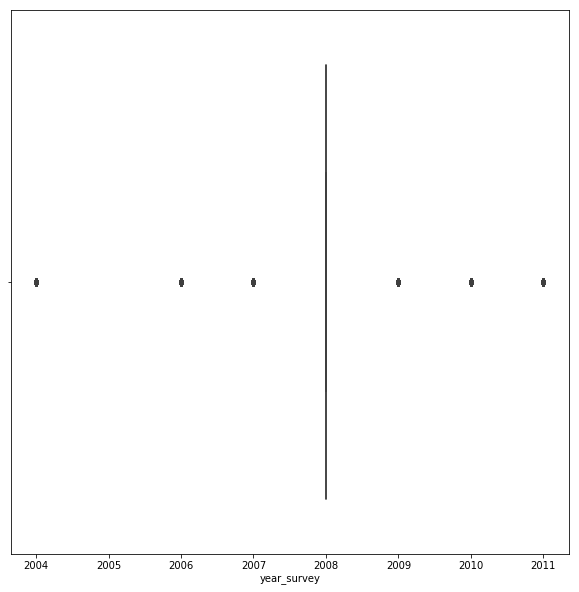

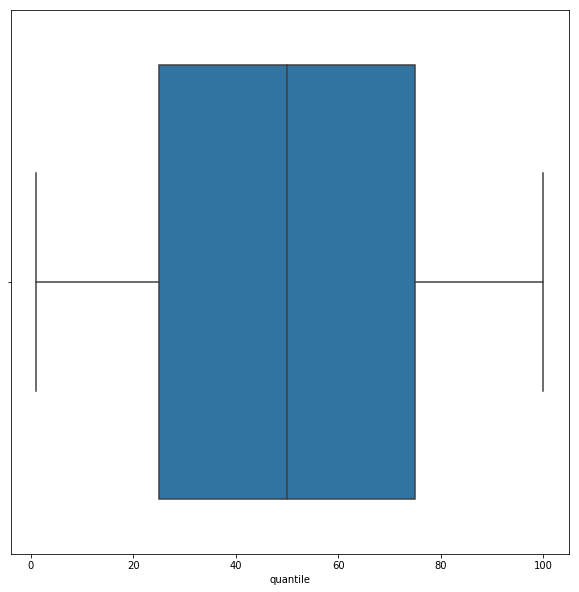

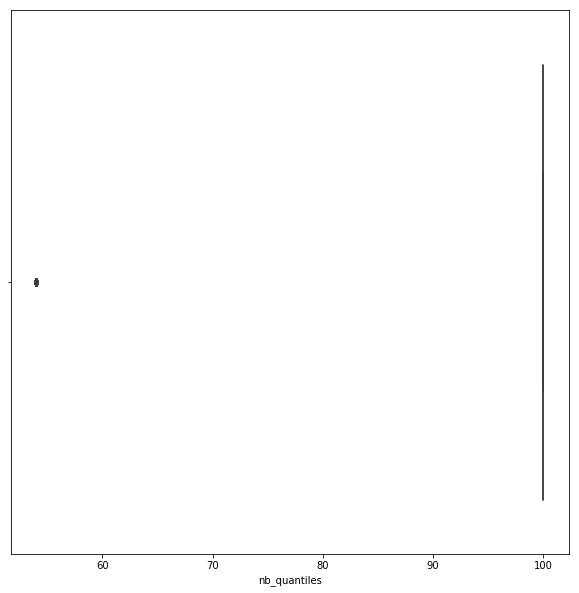

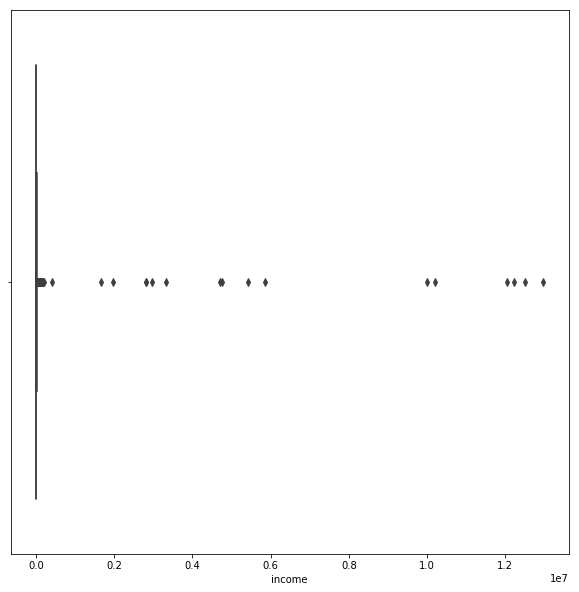

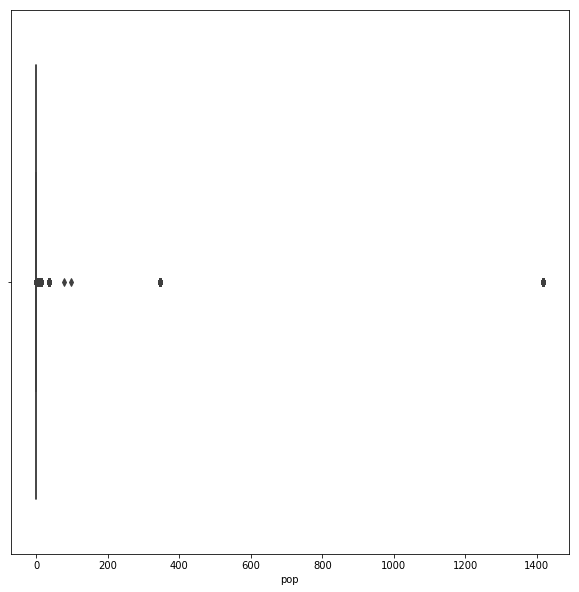

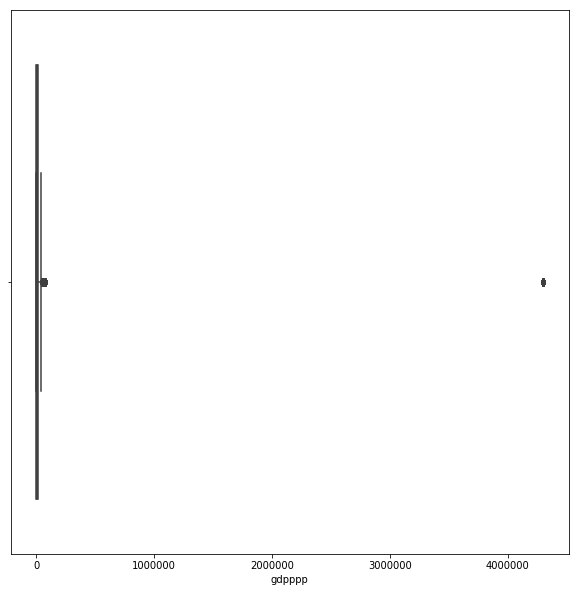

In [16]:
for variable in data.columns:
    
    if (data[variable].dtype == 'int64') or (data[variable].dtype == 'float64'):
        plt.figure(figsize=(10,10))
        plt.subplot()
        sns.boxplot(data[variable])


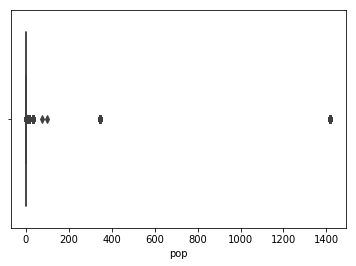

In [17]:
fig = plt.figure()
sns.boxplot(data['pop'])
fig.savefig('../presentation/images/val_abe_population')

<a id='Analyse des valeurs aberantes de la variable pop'></a>

## Analyse des valeurs aberantes de la variable pop

In [18]:
a = data.groupby(['country','year_survey','pop']).count()
a


,,,quantile,nb_quantiles,income,gdpppp
country,year_survey,pop,,,,
ALB,2008,0.031430,100,100,100,100
ARG,2008,0.398761,100,100,100,100
ARM,2008,0.030700,100,100,100,100
AUT,2008,0.083200,100,100,100,100
AZE,2008,0.086788,100,100,100,100
BEL,2008,0.106300,100,100,100,100
BFA,2009,0.155153,100,100,100,100
BGD,2010,1.600001,100,100,100,100
BGR,2008,0.076200,100,100,100,100


La population de Singapour en 2008 = 4.839 millions soit 0.04839

In [19]:
data.loc[data['country'] == 'SGP','pop'] = 0.04839


In [20]:
data[data['country']=='SGP'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
9383,SGP,2008,1,54,1.668132e+06,0.04839,47995.0
9384,SGP,2008,2,54,2.001758e+03,0.04839,47995.0
9385,SGP,2008,3,54,2.502198e+03,0.04839,47995.0
9386,SGP,2008,4,54,2.780220e+03,0.04839,47995.0
9387,SGP,2008,5,54,3.336264e+03,0.04839,47995.0


Note = Il manque des quantiles

In [21]:
data.groupby('pop').max().tail(10)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
pop,,,,,,
1.919715,BRA,2008,100,100,59115.9800,9559.0
2.273450,IDN,2009,100,100,11594.2350,3689.0
3.040600,USA,2008,100,100,176928.5500,43261.0
6.000000,MNE,2008,100,100,27919.8600,10556.0
11.399640,IND,2007,100,100,6176.5205,2796.0
12.000000,CYP,2008,100,100,98480.5600,26273.0
13.256400,CHN,2007,100,100,17091.4040,5712.0
35.000000,LBR,2007,100,100,4287.2000,372.0
346.000000,SDN,2009,100,100,5336.5240,2345.0


LBR = Libéria : Population 2007 = 3.513 millions soit 0.03513 <br>
SDN = Soudan : Population 2009 = 33.65 millions soit 0.3365 <br>
RUS = Russie : Population 2008 = 142.7 millions soit 1.427 <br>
CYP = Chypre : Population 2008 = 1.082 millions soit 0.01082 <br>
MNE = Monténégro : Population 2008 = 616 969 soit 0.0062

In [22]:
data.loc[data['country'] == 'LBR','pop'] = 0.03513
data.loc[data['country'] == 'SDN','pop'] = 0.3365
data.loc[data['country'] == 'RUS','pop'] = 1.427
data.loc[data['country'] == 'CYP','pop'] = 0.01082
data.loc[data['country'] == 'MNE','pop'] = 0.0062


<a id='Mission 1'></a>

# Mission 1

<a id='Résumez les données utilisées'></a>

## Résumez les données utilisées :

    Année(s) des données utilisées
    Nombre de pays présents
    Population couverte par l'analyse (en termes de pourcentage de la population mondiale)


<a id='Années des données utilisées'></a>

### Années des données utilisées


In [23]:
annees_utilisees = data.groupby(['year_survey']).count()
index = annees_utilisees.index
nb_annee = list(index.values)
nb_annee

[2004, 2006, 2007, 2008, 2009, 2010, 2011]

<a id='Nombre de pays présents'></a>

### Nombre de pays présents


In [24]:
nombre_pays_presents = data['country'].value_counts()
nombre_pays_presents = nombre_pays_presents.shape[0]
nombre_pays_presents

118

<a id='Pop'></a>

### Population couverte par l'analyse (en termes de pourcentage de la population mondiale)


In [25]:
pop_couv_par_annee = data.groupby(['country','year_survey']).min()
pop_couv_par_annee = pop_couv_par_annee.reset_index()
pop_couv_par_annee = pop_couv_par_annee[['year_survey','pop']]
pop_couv_par_annee = pop_couv_par_annee.groupby(['year_survey']).sum()
pop_couv_par_annee = pop_couv_par_annee.reset_index()
pop_couv_par_annee

,year_survey,pop
0,2004,0.196378
1,2006,2.956254
2,2007,26.596831
3,2008,23.134793
4,2009,4.546173
5,2010,3.881100
6,2011,0.136757


In [26]:
nombre_pays_par_an = data.groupby(['country','year_survey']).min()
nombre_pays_par_an = nombre_pays_par_an.reset_index()
nombre_pays_par_an= nombre_pays_par_an.groupby(['year_survey']).count()

nombre_pays_par_an = nombre_pays_par_an.reset_index()
nombre_pays_par_an = nombre_pays_par_an[['year_survey','country']]
nombre_pays_par_an

,year_survey,country
0,2004,1
1,2006,5
2,2007,15
3,2008,78
4,2009,12
5,2010,6
6,2011,1


In [27]:
#https://esa.un.org/unpd/wpp/DataQuery/
population_mondiale_par_an = pd.DataFrame(np.array([64.61370865,65.42159383, 66.23847913, 67.89771253, 68.73741054, 69.58169159, 70.43008586 ]),columns=['pop_mondiale'])
tab = pd.concat([pop_couv_par_annee,population_mondiale_par_an],axis=1)
tab['part_pop_mond_couv_par_analyse_(%)'] = tab['pop']/tab['pop_mondiale']*100
tab = pd.merge(tab,nombre_pays_par_an)
tab


,year_survey,pop,pop_mondiale,part_pop_mond_couv_par_analyse_(%),country
0,2004,0.196378,64.613709,0.303926,1
1,2006,2.956254,65.421594,4.518774,5
2,2007,26.596831,66.238479,40.153142,15
3,2008,23.134793,67.897713,34.073008,78
4,2009,4.546173,68.737411,6.613826,12
5,2010,3.881100,69.581692,5.577760,6
6,2011,0.136757,70.430086,0.194174,1


<a id='qtiles'></a>

## Les données de la world income distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

    De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
    Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

Nous appellerons ici chaque quantile une classe de revenu.
Ainsi, la valeur de la colonne income pour un quantile donné peut être vu comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile.

<a id='question'></a>

###  De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?

Les quantiles d'un échantillon statistique de nombres sont des valeurs remarquables permettant de diviser le jeu de ces données ordonnées (i.e. triées) en intervalles consécutifs contenant le même nombre de données (à la justesse de la division entière du nombre total de données, près). Par exemple, un échantillon de 90 données pourra être découpé selon 10 sous-intervalles consécutifs au moyen d'un jeu de 9 quantiles (plus les limites inférieure et supérieure du domaine d'échantillonnage).

Certains jeux de quantiles ont reçu des noms particuliers :

 - les quantiles des multiples du centième sont appelés centiles, ou percentiles selon un anglicisme fréquent. Ainsi, le 5e centile partage l'échantillon en 5 % des données sous lui, et les 95 % restant au-dessus de lui. Le dernier centile (le 99e) joue fréquemment un rôle de seuil d'alerte extrême pour des mesures qui traduisent l'intensité d'un phénomène sujet à des évolutions critiques et en permettent ainsi le suivi (cf. ci-après l'exemple en hydrologie de la définition de la crue centennale) ;

- les quantiles des multiples du dixième sont des déciles. Ils sont d'usage fréquent en géologie minière (étude des caractéristiques granulométriques de matériaux divisés), en hydrologie (définition des hauteurs d'eau, notamment pour les crues, le 9e décile du débit d'une rivière définissant son niveau de crue décennale), ainsi que dans nombre de statistiques médicales ;

- les quantiles des multiples du quart sont les quartiles. Le premier quartile est la statistique notée générale q1 ; le second quartile n'est autre que la médiane ; le troisième quartile est noté q3 et son écart au 1er quartile définit l'écart interquartile, qui est une des mesures classiques de la dispersion de l'échantillon de données, néanmoins plus robuste que l'écart-type.

**Ici les données de la world income distribution présentent pour chaque pays les centiles de la distribution des revenus de leur population respective.**


### Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?
Puisque la moyenne arithtmétique est un indicateur ayant des limites : En effet, l'existence d'une minorité de salariés à revenus elévés a pour cause de tirer la moyenne vers une valeur qui n'est plus représentative du gros des salariés. 
Pour résumer correctement une distribution, il faut en calculer les quantiles.

<a id='explications'></a>

## Donner des explications 
L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque Mondiale, selon la méthode Eltöte-Köves-Szulc. Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents. (Il n'est pas nécessaire de donner cette explication lors de la soutenance)

### Réponse 
Purchasing Power Parity (PPP)  = Parité du Pouvoir d'Achat (PPA)  
La PPA est une méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.

Le pouvoir d'achat d’une quantité donnée d’argent dépend en effet du coût de la vie, c’est-à-dire du niveau général des prix. La PPA permet de mesurer combien une devise permet d’acheter de biens et services dans chacune des zones que l’on compare.

Les économistes forment un « panier » normalisé de biens et de services, dont le contenu peut être sujet à caution (à ce sujet, voir en:Discussion and clarification of PPP).

La monnaie couramment utilisée comme référence est le dollar américain, pris à une année donnée.

### Regroupement des quantiles ? 
Ce n'est pas obligatoire de regrouper, sauf si on trouve que ça simplifie le travail.

Regrouper permet d'avoir un jeu de données un peu plus petit, car sa taille peut vite exploser.

<a id='mission2'></a>

# Mission 2

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
- Représentez la courbe de Lorenz de chacun des pays choisis.
- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?


<a id='diversite'></a>

## Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.

In [28]:
# Sélection de l'année 
data_analyse_2008 = data_avec_nom_pays[data_avec_nom_pays['year_survey'] == 2008]
data_analyse_2008.head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp,country_name
0,ALB,2008.0,1.0,100.0,728.89795,0.03143,7297.0,Albania
1,ALB,2008.0,2.0,100.0,916.66235,0.03143,7297.0,Albania
2,ALB,2008.0,3.0,100.0,1010.91600,0.03143,7297.0,Albania
3,ALB,2008.0,4.0,100.0,1086.90780,0.03143,7297.0,Albania
4,ALB,2008.0,5.0,100.0,1132.69970,0.03143,7297.0,Albania


In [29]:
liste_pays_a_analyser = ['PER','DEU','CAN','MEX','AUT']
liste_couleurs = ['maroon','cyan','dimgray','darkgoldenrod','orchid']

In [30]:
data_analyse_2008[data_analyse_2008['country'] == 'PER'].head()


,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp,country_name
8583,PER,2008.0,1.0,100.0,172.70412,0.288367,7858.0,Peru
8584,PER,2008.0,2.0,100.0,297.08900,0.288367,7858.0,Peru
8585,PER,2008.0,3.0,100.0,362.47195,0.288367,7858.0,Peru
8586,PER,2008.0,4.0,100.0,407.27008,0.288367,7858.0,Peru
8587,PER,2008.0,5.0,100.0,446.69992,0.288367,7858.0,Peru


In [31]:
for i in enumerate(liste_couleurs):
    print(i)

(0, 'maroon')
(1, 'cyan')
(2, 'dimgray')
(3, 'darkgoldenrod')
(4, 'orchid')


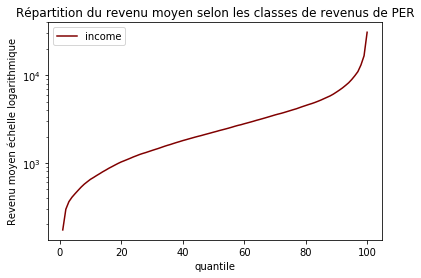

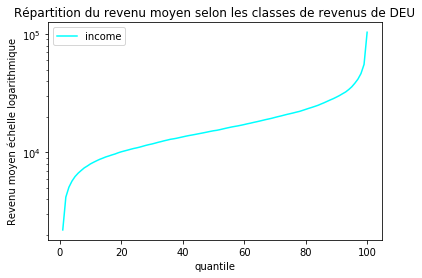

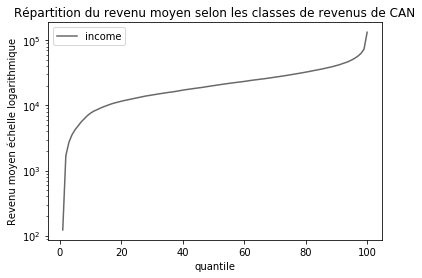

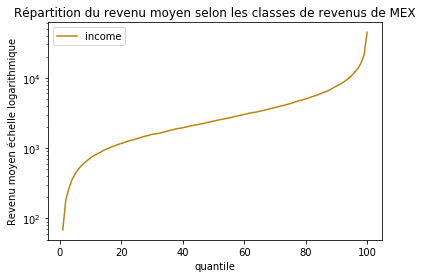

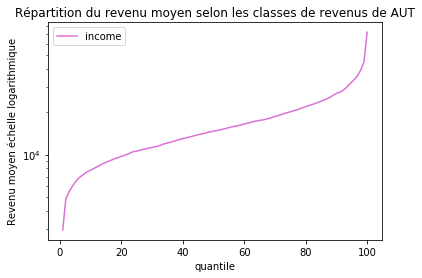

In [32]:
i = 0
for pays in liste_pays_a_analyser:
    analys = data_analyse_2008[data_analyse_2008['country'] == pays]
    analys.plot(x='quantile',y='income',color=liste_couleurs[i])
    plt.yscale('log')
    plt.ylabel('Revenu moyen échelle logarithmique')
    plt.title('Répartition du revenu moyen selon les classes de revenus de {}'.format(pays))
    i = i+ 1


<a id='lorenz'></a>

## Représentez la courbe de Lorenz de chacun des pays choisis.

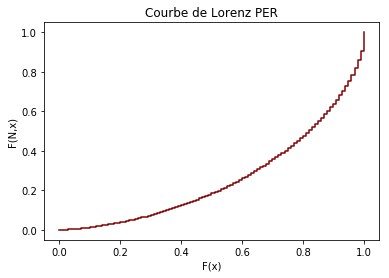

L'indice de gini est 0.49


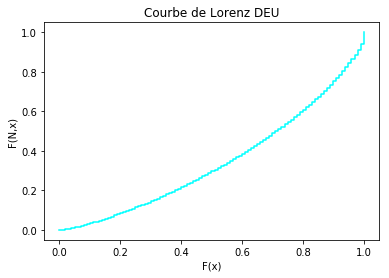

L'indice de gini est 0.32


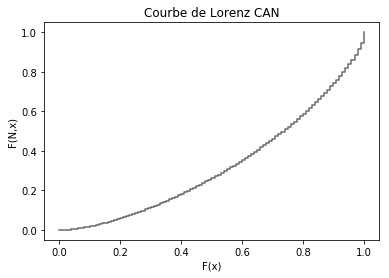

L'indice de gini est 0.37


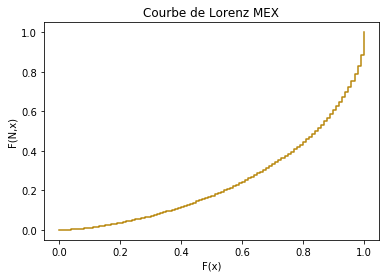

L'indice de gini est 0.52


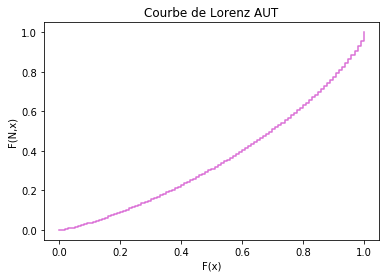

L'indice de gini est 0.3


In [33]:
i = 0
for pays in liste_pays_a_analyser:
    analys = data_analyse_2008[data_analyse_2008['country'] == pays]
    echantillon = analys['income']
    #Sélection du sous-échantillon de travail que l'on appelle  revenus
    ech = echantillon.values
    #On place les observations dans une variable
    lorenz = np.cumsum(np.sort(ech)) / ech.sum()

    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plot_lorenz = plt.figure()
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color=liste_couleurs[i])
    titre_lorenz = 'Courbe de Lorenz {}'.format(pays)
    plt.title(titre_lorenz)
    ylabel_lorenz = 'F(N,x)'
    plt.ylabel(ylabel_lorenz)
    xlabel_lorenz = 'F(x)'
    plt.xlabel(xlabel_lorenz)


    #Indice de Gini
    aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
    S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
    gini = round(2*S,2)

    plt.show(plot_lorenz)
    print("L'indice de gini est {}".format(gini))
    i=i+1
    


<a id='gini'></a>

## Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.

In [34]:
data_indice_gini = pd.read_csv('../fichiers_csv/indice_gini.csv')
data_indice_gini

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4,NaN
8,Armenia,ARM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,NaN
9,American Samoa,ASM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_indice_gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [36]:
data_indice_gini = data_indice_gini[['Country Name','Country Code','2004','2005','2006','2007','2008','2009','2010','2011']]
data_indice_gini.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN
3,Albania,ALB,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quantité de valeurs nulles 

In [37]:
data_indice_gini.isnull().sum()


Country Name      0
Country Code      0
2004            194
2005            190
2006            190
2007            192
2008            193
2009            188
2010            181
2011            190
dtype: int64

In [38]:
len(data_indice_gini)

264

### Evolution de l'indice gini

In [39]:

for pays in liste_pays_a_analyser:
    a = data_indice_gini[data_indice_gini['Country Code'] == pays]
    b = a.pivot_table(columns = 'Country Code')
    b.columns = ['gini']
    b.reset_index(inplace=True)
    b.columns = ['annee','gini']

    source = bk.ColumnDataSource(b) #Le df est converti en source pour le graphique bokeh
    plot = bk.figure(title="Evolution de l'indice de gini {} ".format(pays))#Mise en forme

    plot.line('annee','gini',source=source, color='grey') #Contenu
    plot.xaxis.axis_label = "Periode en année"
    plot.yaxis.axis_label = "Indice de Gini"
    bk.show(plot)

    

In [40]:
i = 0
liste = list()
for annee in nb_annee:
    a = data_avec_nom_pays[data_avec_nom_pays['year_survey'] == annee]
    for pays in liste_pays_a_analyser:
        analys = a[a['country'] == pays]
        echantillon = analys['income']
        #Sélection du sous-échantillon de travail que l'on appelle  revenus
        ech = echantillon.values
        #On place les observations dans une variable
        lorenz = np.cumsum(np.sort(ech)) / ech.sum()

        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


        #Indice de Gini
        aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
        S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
        gini = round(2*S,2)
        liste.append(gini)
print(liste)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.49, 0.32, 0.37, 0.52, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Imputation des indice de gini provenant d'une autre source
Compte tenu de nombreuses valeurs manquantes. Nous allons reperformer l'analyse selon une autre source : http://perspective.usherbrooke.ca/bilan/servlet/BilanEssai?codetheme=2&codeStat=PMQUANDL.GINI.V1&grandesRegions=0&anneeStat1=2001&codeStat2=x&mode=carte&afficheNom=aucun&langue=fr

In [41]:
new_indice_gini = pd.read_csv('../fichiers_csv/new_indice_gini.csv')
del new_indice_gini['Unnamed: 0']

In [42]:
new_indice_gini.head()

,Noms,Date,PMQUANDL.GINI.V1
0,DEU,1981,28.13
1,DEU,1983,28.46
2,DEU,1984,29.21
3,DEU,1989,28.61
4,DEU,1994,30.01


In [43]:
for pays in liste_pays_a_analyser:
    a = new_indice_gini[new_indice_gini['Noms'] == pays]


    source = bk.ColumnDataSource(a) #Le df est converti en source pour le graphique bokeh
    plot = bk.figure(title="Evolution de l'indice de gini {} ".format(pays))#Mise en forme

    plot.line('Date','PMQUANDL.GINI.V1',source=source, color='grey') #Contenu
    plot.xaxis.axis_label = "Periode en année"
    plot.yaxis.axis_label = "Indice de Gini"
    bk.show(plot)

<a id='classement'></a>

## Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [44]:
data_indice_gini_0 = data_indice_gini.fillna(0)
data_indice_gini_0.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,0.0,0.0,0.0,0.0,42.7,0.0,0.0,0.0
3,Albania,ALB,0.0,30.6,0.0,0.0,30.0,0.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
for annee in nb_annee:
    classement = data_indice_gini_0.sort_values(by=str(annee),ascending=False)
    classement = classement[['Country Name','Country Code',str(annee)]]
    classement = classement.reset_index(drop=True)
    print(classement.head())
    print(classement[classement['Country Code']== 'FRA'])

  Country Name Country Code  2004
0     Honduras          HND  58.1
1       Brazil          BRA  56.5
2      Comoros          COM  55.9
3      Bolivia          BOL  55.0
4       Panama          PAN  54.9
   Country Name Country Code  2004
50       France          FRA  30.6
  Country Name Country Code  2006
0     Honduras          HND  57.5
1      Bolivia          BOL  56.7
2       Brazil          BRA  55.6
3       Panama          PAN  54.7
4       Zambia          ZMB  54.6
   Country Name Country Code  2006
59       France          FRA  29.7
  Country Name Country Code  2007
0     Honduras          HND  55.8
1       Brazil          BRA  54.9
2      Bolivia          BOL  54.5
3      Ecuador          ECU  53.3
4     Paraguay          PRY  53.0
   Country Name Country Code  2007
43       France          FRA  32.4
               Country Name Country Code  2008
0              South Africa          ZAF  63.0
1  Central African Republic          CAF  56.2
2                  Honduras          

<a id='mission3'></a>

# Mission 3

Nous allons donc simuler la classe de revenu des parents grâce à un coefficient ρj (propre à chaque pays j ) mesurant une corrélation entre le revenu de l'individu i et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité. (Pour plus d'informations sur le calcul du coefficient d'élasticité, consulter ce document).

On a :
mj le salaire moyen du pays  j

Gj l'indice de Gini du pays j

Définition : l'élasticité mesure la variation d'une grandeur provoquée par la variation d'une autre grandeur.

Exemple : Pour un produit donné, lorsque les volumes demandés augmentent de 15 % quand le prix de vente baisse de 10 %, l'élasticité de la demande par rapport au prix de vente est le quotient de la variation de la demande rapporté à la variation de prix de vente, soit -1,5 = ( 15 % / -10 % ).

https://fr.wikipedia.org/wiki/%C3%89lasticit%C3%A9_(%C3%A9conomie)

<a id='recup'></a>

## Récupération des données du fichier.txt sous la forme d'un dataframe

In [46]:
fichier_coef = open('../fichiers_csv/elasticity.txt','r')
contenu_fichier = fichier_coef.read()
fichier_coef.close()

In [47]:
contenu_fichier


'Coefficients of intergenerational elasticity between parents’ and\nchildren’s income\n\n\n                          | Base case  | Optimistic     | Pessimistic\n                          |            | (high mobility)| (low mobility)\n---------------------------------------------------------------------------\nNordic European countries |    0.2     |      0.15      |    0.3\nand Canada                |            |                |\n---------------------------------------------------------------------------\nEurope (except nordic     |    0.4     |      0.3       |    0.5\ncountries)                |            |                |\n---------------------------------------------------------------------------\nAustralia/New Zealand/USA |    0.4     |      0.3       |    0.5\n---------------------------------------------------------------------------\nAsia                      |    0.5     |      0.4       |    0.6\n--------------------------------------------------------------------------

In [48]:
coef = re.findall(pattern=r'[0-9]+\.{1}[0-9]+',string=contenu_fichier)
len(coef)

15

In [49]:
mat_coef = np.array(coef).reshape(5,3)
df_coef = pd.DataFrame(index=['Nordic European countries and Canada','Europe (except nordic countries)','Austrialia/New Zealand/USA','Asia','Latin America/Africa'],columns=['Base case','Optimistic (high mobility)','Pessimistic(low mobility)'],data=mat_coef)
df_coef

,Base case,Optimistic (high mobility),Pessimistic(low mobility)
Nordic European countries and Canada,0.2,0.15,0.3
Europe (except nordic countries),0.4,0.3,0.5
Austrialia/New Zealand/USA,0.4,0.3,0.5
Asia,0.5,0.4,0.6
Latin America/Africa,0.66,0.5,0.9


Base Case ? Optimistic ? Pessimistic ? --> Pas de précision dans le document

<a id='generate'></a>

## Pour chaque valeur de ρj , générez un échantillon de valeurs yi distribuées selon une loi normale.

Coeficient d'élasticité = Variation revenus parents / Variation revenus enfants

 DONC ... Variation revenus parents = Coef d'élasticité * Variation revenus enfants

Générer un échantillon Gaussien

In [50]:
liste_coef = pd.Series.tolist(df_coef['Base case'])
liste_coef = [float(i) for i in liste_coef]

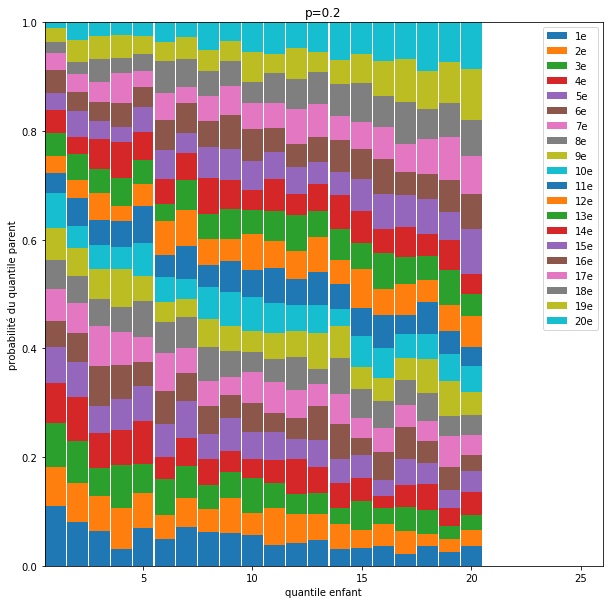

       0      1      2      3      4      5      6      7      8      9   \
0   0.110  0.080  0.064  0.030  0.070  0.050  0.072  0.062  0.060  0.056   
1   0.072  0.072  0.064  0.076  0.064  0.044  0.052  0.042  0.064  0.042   
2   0.080  0.078  0.052  0.080  0.054  0.066  0.060  0.044  0.048  0.064   
3   0.074  0.080  0.064  0.064  0.078  0.040  0.052  0.048  0.040  0.034   
4   0.066  0.064  0.050  0.056  0.064  0.060  0.068  0.046  0.060  0.050   
5   0.048  0.054  0.074  0.064  0.044  0.062  0.050  0.052  0.042  0.054   
6   0.060  0.056  0.074  0.060  0.046  0.070  0.046  0.046  0.034  0.056   
7   0.052  0.050  0.048  0.046  0.068  0.056  0.058  0.062  0.048  0.038   
8   0.060  0.050  0.056  0.070  0.046  0.038  0.032  0.052  0.046  0.038   
9   0.064  0.042  0.044  0.040  0.060  0.046  0.038  0.058  0.062  0.062   
10  0.036  0.050  0.046  0.048  0.068  0.040  0.060  0.042  0.056  0.050   
11  0.032  0.034  0.050  0.028  0.040  0.062  0.066  0.048  0.042  0.066   
12  0.042  0

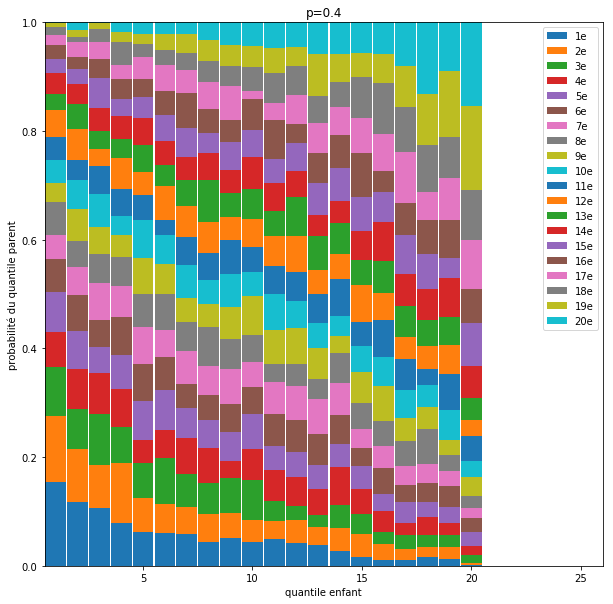

       0      1      2      3      4      5      6      7      8      9   \
0   0.154  0.118  0.106  0.078  0.062  0.060  0.058  0.044  0.052  0.044   
1   0.122  0.096  0.080  0.112  0.062  0.054  0.050  0.052  0.046  0.040   
2   0.090  0.074  0.094  0.066  0.066  0.084  0.060  0.056  0.064  0.074   
3   0.064  0.074  0.074  0.070  0.042  0.052  0.068  0.064  0.030  0.056   
4   0.074  0.070  0.048  0.062  0.072  0.074  0.054  0.052  0.054  0.066   
5   0.060  0.066  0.050  0.070  0.068  0.060  0.044  0.046  0.052  0.048   
6   0.044  0.052  0.068  0.056  0.068  0.050  0.062  0.054  0.064  0.046   
7   0.062  0.048  0.054  0.054  0.060  0.066  0.052  0.072  0.056  0.050   
8   0.034  0.058  0.050  0.040  0.066  0.056  0.044  0.042  0.058  0.072   
9   0.042  0.054  0.060  0.036  0.070  0.052  0.062  0.044  0.060  0.044   
10  0.042  0.036  0.052  0.050  0.046  0.028  0.050  0.050  0.064  0.046   
11  0.050  0.058  0.030  0.056  0.042  0.062  0.058  0.056  0.042  0.052   
12  0.030  0

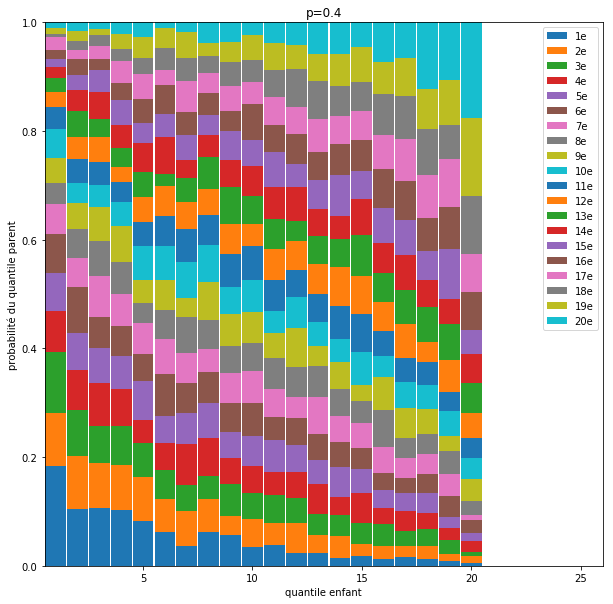

       0      1      2      3      4      5      6      7      8      9   \
0   0.184  0.104  0.106  0.102  0.082  0.062  0.036  0.062  0.056  0.034   
1   0.098  0.098  0.084  0.084  0.082  0.060  0.064  0.060  0.036  0.052   
2   0.112  0.084  0.068  0.072  0.062  0.054  0.048  0.044  0.058  0.048   
3   0.074  0.074  0.078  0.068  0.042  0.050  0.076  0.070  0.048  0.050   
4   0.070  0.068  0.064  0.060  0.072  0.050  0.058  0.064  0.048  0.054   
5   0.072  0.084  0.058  0.056  0.050  0.076  0.054  0.056  0.054  0.062   
6   0.056  0.054  0.076  0.058  0.056  0.066  0.056  0.042  0.054  0.058   
7   0.038  0.054  0.064  0.058  0.038  0.052  0.066  0.054  0.050  0.052   
8   0.046  0.048  0.062  0.068  0.042  0.056  0.034  0.070  0.060  0.056   
9   0.054  0.036  0.040  0.044  0.062  0.062  0.066  0.068  0.048  0.060   
10  0.040  0.044  0.042  0.036  0.044  0.056  0.062  0.056  0.062  0.062   
11  0.028  0.040  0.046  0.028  0.046  0.054  0.050  0.048  0.054  0.040   
12  0.026  0

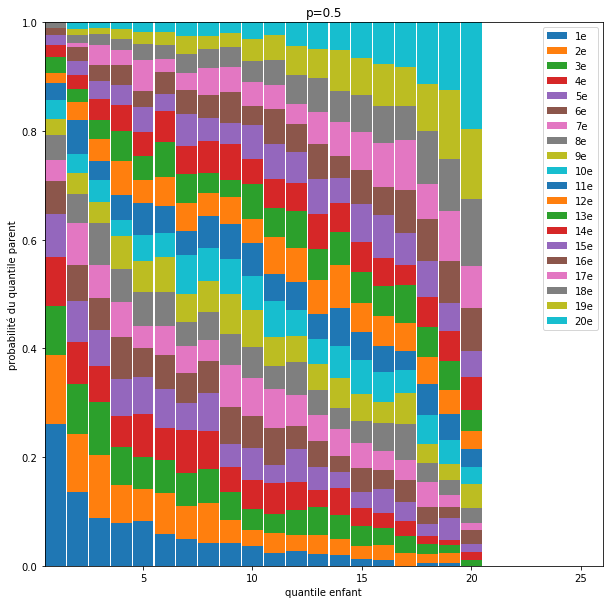

       0      1      2      3      4      5      6      7      8      9   \
0   0.260  0.136  0.088  0.078  0.082  0.058  0.050  0.042  0.042  0.036   
1   0.128  0.106  0.116  0.070  0.060  0.076  0.060  0.074  0.042  0.030   
2   0.090  0.092  0.098  0.070  0.058  0.060  0.060  0.062  0.052  0.038   
3   0.090  0.078  0.066  0.058  0.080  0.060  0.080  0.070  0.046  0.054   
4   0.080  0.076  0.066  0.068  0.068  0.072  0.050  0.070  0.042  0.058   
5   0.060  0.066  0.058  0.076  0.052  0.062  0.054  0.058  0.068  0.060   
6   0.038  0.076  0.062  0.066  0.042  0.054  0.050  0.040  0.078  0.070   
7   0.046  0.054  0.076  0.060  0.062  0.062  0.044  0.050  0.056  0.056   
8   0.030  0.038  0.040  0.060  0.056  0.064  0.052  0.058  0.074  0.068   
9   0.034  0.036  0.040  0.030  0.048  0.044  0.072  0.060  0.064  0.064   
10  0.032  0.062  0.034  0.046  0.060  0.050  0.044  0.060  0.064  0.060   
11  0.018  0.034  0.042  0.062  0.042  0.054  0.052  0.042  0.050  0.044   
12  0.030  0

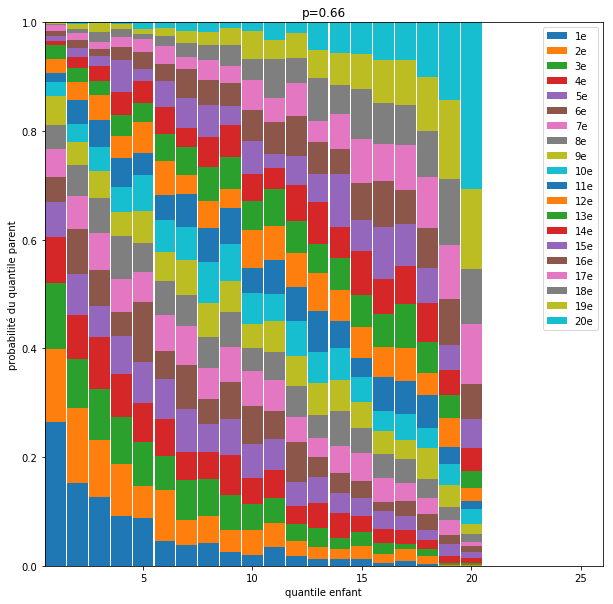

       0      1      2      3      4      5      6      7      8      9   \
0   0.264  0.152  0.126  0.092  0.088  0.046  0.038  0.042  0.026  0.020   
1   0.134  0.138  0.106  0.096  0.058  0.094  0.046  0.050  0.040  0.046   
2   0.122  0.090  0.094  0.086  0.082  0.062  0.074  0.068  0.064  0.048   
3   0.084  0.082  0.094  0.078  0.072  0.068  0.052  0.050  0.074  0.048   
4   0.066  0.074  0.058  0.070  0.074  0.074  0.078  0.050  0.066  0.062   
5   0.046  0.084  0.066  0.044  0.112  0.052  0.082  0.046  0.068  0.070   
6   0.050  0.060  0.068  0.062  0.054  0.066  0.072  0.058  0.064  0.064   
7   0.044  0.058  0.064  0.078  0.054  0.062  0.056  0.056  0.064  0.042   
8   0.054  0.042  0.050  0.044  0.058  0.054  0.064  0.064  0.058  0.044   
9   0.026  0.032  0.044  0.046  0.066  0.058  0.062  0.074  0.068  0.058   
10  0.016  0.044  0.050  0.054  0.042  0.046  0.060  0.064  0.066  0.046   
11  0.026  0.034  0.046  0.040  0.056  0.062  0.034  0.050  0.036  0.070   
12  0.026  0

In [51]:
size = 10000
nb_quantiles = 20
for p in liste_coef:
    child_salaries, parent_salaries = gensam.generate_salaries(size, p)
    data = gensam.quantiles_dataframe(child_salaries, parent_salaries,nb_quantiles)
    proba_matrice = gensam.proba_matrice_from_dataframe(data, nb_quantiles)
    gensam.plot_proba_matrice(proba_matrice, nb_quantiles,p)
    print(pd.DataFrame(proba_matrice.T))

<a id='qtile_parent'></a>

## Pour chacun des revenus enfants / parents, déterminez le quantile correspondant.

In [52]:
def cons_ech_qtiles_20(data,pays):
    ech_base = data[data['country'] == pays].reset_index(drop=True)
    df = pd.DataFrame(ech_base['income'])
    df['new_quantile'] = pd.Series(np.repeat(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),5))
    df = df.groupby('new_quantile').sum().reset_index()
    echantillon_ech_base = ech_base.drop(['quantile','nb_quantiles','income'],axis=1).head(20)
    echantillon_ech_base = pd.concat([echantillon_ech_base,df],axis=1)
    return echantillon_ech_base

### On transforme les centiles en quantile de 20 pour chaque pays

##### Perou

In [53]:
echantillon_peru = cons_ech_qtiles_20(data_analyse_2008,'PER')

##### Mexique

In [54]:
echantillon_mexico = cons_ech_qtiles_20(data_analyse_2008,'MEX')

##### Allemagne

In [55]:
echantillon_germany = cons_ech_qtiles_20(data_analyse_2008,'DEU')

##### Canada

In [56]:
echantillon_canada = cons_ech_qtiles_20(data_analyse_2008,'CAN')

##### Autriche

In [57]:
echantillon_austria = cons_ech_qtiles_20(data_analyse_2008,'AUT')

### Lier les quantiles de revenus de base avec les quantiles de revenus des parents générés précédemment

On va construire une nouvelle colonne dans nos echantillon de pays : quantile_parent qui représentera le quantile d'appartenance des parents selon le quantile des enfants (new_quantile)

In [58]:
def creation_qtiles_parents(p,nb_quantiles):
    ind_mat_prob = ['Qtile parents {}'.format(x) for x in np.arange(1,nb_quantiles + 1,1) ]
    col_mat_prob = ['Qtile enfants {}'.format(x) for x in np.arange(1,nb_quantiles + 1,1) ]
    child_salaries, parent_salaries = gensam.generate_salaries(size, p)
    data = gensam.quantiles_dataframe(child_salaries, parent_salaries,nb_quantiles)
    proba_matrice = gensam.proba_matrice_from_dataframe(data, nb_quantiles)
    df_mat_prob_qtiles = pd.DataFrame(proba_matrice.T,index=ind_mat_prob,columns=col_mat_prob)

    extract_float = [df_mat_prob_qtiles[str(x)].idxmax() for x in col_mat_prob]
    qtiles_parents = np.array([[int(s) for s in str.split(elt) if s.isdigit()] for i,elt in enumerate(extract_float)])
    return qtiles_parents

##### Matrice des probabilités d'appartenance à un quantile : Latin America (MEX,PER) : Coef = 0,66

In [59]:
qtiles_parents_latin_20 = creation_qtiles_parents(0.66,20)

##### Ajout quantiles parent et income parent à ech peru

In [60]:
def ajout_qtiles_parents(data,qtiles_parents):
    data['quantile_parent'] = qtiles_parents

    df = data[['new_quantile','income','quantile_parent']]
    data =pd.merge(df,data,on=['quantile_parent']).drop_duplicates(subset=['new_quantile_x']).drop(['new_quantile_y'],axis=1)
    data.reset_index(drop=True,inplace=True)
    mylist = list(data.columns); mylist[0] = 'quantile_enfant';mylist[1]='income';
    mylist[8]='income_parent'; data.columns = mylist
    return data

In [61]:
echantillon_peru = ajout_qtiles_parents(echantillon_peru,qtiles_parents_latin_20)

##### Ajout quantiles parent et income parent à ech mex

In [62]:
echantillon_mexico = ajout_qtiles_parents(echantillon_mexico,qtiles_parents_latin_20)

##### Matrice des probabilités d'appartenance à un quantile :  Nordic European countries and Canada (CAN) : Coef = 0,2

In [63]:
qtiles_parents_nord_20 = creation_qtiles_parents(0.2,20)


##### Ajout quantiles parent et income parent à ech can

In [64]:
echantillon_canada = ajout_qtiles_parents(echantillon_canada,qtiles_parents_nord_20)

##### Matrice des probabilités d'appartenance à un quantile :  Europe (except nordic countries) (DEU,AUT) : Coef = 0,4

In [65]:
qtiles_parents_europe_20 = creation_qtiles_parents(0.4,20)


##### Ajout quantiles parent et income parent à ech deu

In [66]:
echantillon_germany = ajout_qtiles_parents(echantillon_germany,qtiles_parents_europe_20)

##### Ajout quantiles parent et income parent à ech aut

In [67]:
echantillon_austria = ajout_qtiles_parents(echantillon_austria,qtiles_parents_europe_20)

<a id='associate'></a>

## Pour chaque individu de la Word Income Distribution, associez les quartiles enfants / parents qui conviennent.

### Transfomer les quantiles de 20 en quartiles

##### Perou

In [68]:
def cons_ech_qtiles_4(ech_base):
    ech_quart = ech_base.copy()
    df = pd.DataFrame(ech_quart['income'])
    df['new_quantile'] = pd.Series(np.repeat(np.array([1,2,3,4]),5))
    df = df.groupby('new_quantile').sum().reset_index()
    ech_quart = ech_quart.drop(['quantile_enfant','quantile_parent','income','income_parent'],axis=1).head(4)
    ech_quart = pd.concat([ech_quart,df],axis=1)
    return ech_quart

In [69]:
ech_quart_peru = cons_ech_qtiles_4(echantillon_peru)


##### Mexique

In [70]:
ech_quart_mexico = cons_ech_qtiles_4(echantillon_mexico)


##### Canada

In [71]:
ech_quart_canada = cons_ech_qtiles_4(echantillon_canada)


##### Allemagne

In [72]:
ech_quart_germany = cons_ech_qtiles_4(echantillon_germany)


##### Autriche

In [73]:
ech_quart_austria = cons_ech_qtiles_4(echantillon_austria)


### Génération des quartiles parents

On va construire une nouvelle colonne dans nos echantillon de pays : quantile_parent qui représentera le quantile d'appartenance des parents selon le quantile des enfants (new_quantile)

##### Matrice des probabilités d'appartenance à un quantile : Latin America (MEX,PER) : Coef = 0,66

In [74]:
qtiles_parents_latin_4 = creation_qtiles_parents(0.66,4)

##### Ajout quantiles parent et income parent à ech peru

In [75]:
ech_quart_peru = ajout_qtiles_parents(ech_quart_peru,qtiles_parents_latin_4)

##### Ajout quantiles parent et income parent à ech mex

In [76]:
ech_quart_mexico = ajout_qtiles_parents(ech_quart_mexico,qtiles_parents_latin_4)

##### Matrice des probabilités d'appartenance à un quantile :  Nordic European countries and Canada (CAN) : Coef = 0,2

In [77]:
qtiles_parents_nord_4 = creation_qtiles_parents(0.2,4)


##### Ajout quantiles parent et income parent à ech can

In [78]:
ech_quart_canada = ajout_qtiles_parents(ech_quart_canada,qtiles_parents_nord_4)

##### Matrice des probabilités d'appartenance à un quantile :  Europe (except nordic countries) (DEU,AUT) : Coef = 0,4

In [79]:
qtiles_parents_europe_4 = creation_qtiles_parents(0.4,4)


##### Ajout quantiles parent et income parent à ech deu

In [80]:
ech_quart_germany = ajout_qtiles_parents(ech_quart_germany,qtiles_parents_europe_4)

##### Ajout quantiles parent et income parent à ech aut

In [81]:
ech_quart_austria = ajout_qtiles_parents(ech_quart_austria,qtiles_parents_europe_4)

<a id='mission4'></a>

# Mission 4

<a id='anova'></a>

## Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

ANOVA one-way: Prédire une variable quantitative à partir d'une variable qualitative.

Variable explicative X = 'country' <br>
Variable à expliquer Y = ??? Revenu potentiel des enfants ????

### Données avec nb_quantiles = 20 avec ajout indice de gini 

http://perspective.usherbrooke.ca/bilan/servlet/BMTendanceStatPays?codeTheme=2&codeStat=PMQUANDL.GINI.V1&codePays=DEU&optionsPeriodes=Aucune&codeTheme2=2&codeStat2=x&codePays2=AUT&optionsDetPeriodes=avecNomP&langue=fr

Gini 2008 Allemagne : 31.29 <br>
Gini 2008 Pérou : 48.45 <br>
Gini 2008 Mexique : 48.23 <br>
Gini 2008 Autriche : 30.45 <br>
Gini 2008 Canada : 33.90 <br>

## Salaires moyens des pays en 2008

In [82]:
salaire_moyen_2008_20 = [echantillon_peru['income'].mean(),echantillon_mexico['income'].mean(),echantillon_germany['income'].mean(),echantillon_canada['income'].mean(),echantillon_austria['income'].mean()]

In [83]:
donnees_20_qtiles = pd.concat([echantillon_peru,echantillon_mexico,echantillon_germany,echantillon_canada,echantillon_austria],ignore_index=True)
donnees_20_qtiles['indice_gini'] = np.repeat(np.array([48.45,48.23 ,33.29, 33.90,30.45]), 20)
donnees_20_qtiles['salaire_moyen_pays_2008'] = np.repeat(np.array(salaire_moyen_2008_20), 20)

In [84]:
donnees_20_qtiles

,quantile_enfant,income,quantile_parent,country,year_survey,pop,gdpppp,country_name,income_parent,indice_gini,salaire_moyen_pays_2008
0,1,1686.235070,1,PER,2008.0,0.288367,7858.0,Peru,1686.235070,48.45,16652.666744
1,2,2856.277570,1,PER,2008.0,0.288367,7858.0,Peru,1686.235070,48.45,16652.666744
2,3,3780.787270,1,PER,2008.0,0.288367,7858.0,Peru,1686.235070,48.45,16652.666744
3,4,4742.154160,3,PER,2008.0,0.288367,7858.0,Peru,4742.154160,48.45,16652.666744
4,7,7517.163400,3,PER,2008.0,0.288367,7858.0,Peru,4742.154160,48.45,16652.666744
5,5,5672.097600,4,PER,2008.0,0.288367,7858.0,Peru,5672.097600,48.45,16652.666744
6,6,6583.114900,5,PER,2008.0,0.288367,7858.0,Peru,6583.114900,48.45,16652.666744
7,8,8551.131700,2,PER,2008.0,0.288367,7858.0,Peru,8551.131700,48.45,16652.666744
8,9,9620.402600,6,PER,2008.0,0.288367,7858.0,Peru,9620.402600,48.45,16652.666744
9,10,10726.457100,11,PER,2008.0,0.288367,7858.0,Peru,10726.457100,48.45,16652.666744


### Données avec nb_quantiles = 4

In [85]:
salaire_moyen_2008_4 = [ech_quart_peru['income'].mean(),ech_quart_mexico['income'].mean(),ech_quart_germany['income'].mean(),ech_quart_canada['income'].mean(),ech_quart_austria['income'].mean()]

In [86]:
donnees_quartiles = pd.concat([ech_quart_peru,ech_quart_mexico,ech_quart_germany,ech_quart_canada,ech_quart_austria],ignore_index=True)
donnees_quartiles['indice_gini'] = np.repeat(np.array([48.45,48.23 ,33.29, 33.90,30.45]), 4) # Ajout des indices de gini
donnees_quartiles['salaire_moyen_pays_2008'] = np.repeat(np.array(salaire_moyen_2008_4), 4)

In [87]:
donnees_quartiles

,quantile_enfant,income,quantile_parent,country,year_survey,pop,gdpppp,country_name,income_parent,indice_gini,salaire_moyen_pays_2008
0,1,2.058262e+04,1,PER,2008.0,0.288367,7858.0,Peru,20582.617470,48.45,83263.333718
1,2,4.115320e+04,2,PER,2008.0,0.288367,7858.0,Peru,41153.203900,48.45,83263.333718
2,3,7.592627e+04,3,PER,2008.0,0.288367,7858.0,Peru,75926.271700,48.45,83263.333718
3,4,1.953912e+05,4,PER,2008.0,0.288367,7858.0,Peru,195391.241800,48.45,83263.333718
4,1,2.241107e+04,1,MEX,2008.0,1.063504,13434.0,Mexico,22411.070954,48.23,97145.756913
5,2,4.516564e+04,2,MEX,2008.0,1.063504,13434.0,Mexico,45165.635200,48.23,97145.756913
6,3,8.168318e+04,3,MEX,2008.0,1.063504,13434.0,Mexico,81683.175200,48.23,97145.756913
7,4,2.393231e+05,4,MEX,2008.0,1.063504,13434.0,Mexico,239323.146300,48.23,97145.756913
8,1,2.136759e+05,1,DEU,2008.0,0.822700,33758.0,Germany,213675.945200,33.29,451542.953550
9,2,3.296895e+05,1,DEU,2008.0,0.822700,33758.0,Germany,213675.945200,33.29,451542.953550


## Calculs Python

Graphique 1 : 

In [88]:
X = 'country'
Y = 'income'

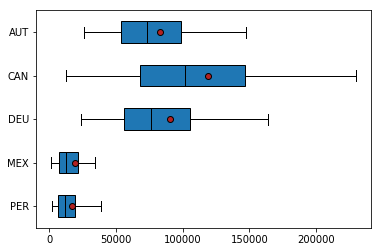

In [89]:
modalites = donnees_20_qtiles[X].unique()
groupes = []
for m in modalites:
    groupes.append(donnees_20_qtiles[donnees_20_qtiles[X]==m][Y])
    
    
# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


Graphique 2 :

In [90]:
moyennes = donnees_20_qtiles.groupby(X).mean().reset_index()

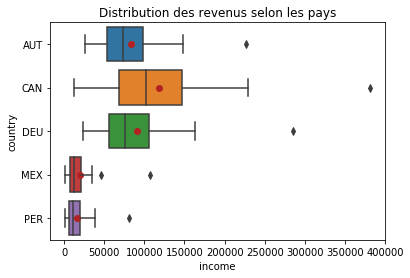

In [91]:
fig = plt.figure()
sns.boxplot(y=X,x=Y,data=donnees_20_qtiles,order=moyennes[X])
plt.scatter(y=moyennes[X],x=moyennes[Y].values,color='firebrick')
plt.title('Distribution des revenus selon les pays')
fig.savefig('../presentation/images/anova_pays_income')

In [92]:
calc_anova(X,Y,donnees_20_qtiles)

{'P-valeur': 7.119215137864211e-10,
 'SCE': 165336894903.419,
 'SCR': 250795094497.185,
 'SCT': 416131989400.604,
 'Valeur_F': 15.657209172407805,
 'eta_squared': 0.397}

## Scipy

H0 : La moyenne de la variable dépendante est la même quelque soit le groupe définis par le facteur et est égal à la moyenne globale (en bref, le facteur n'a aucune influence sur la variable dépendante.

In [93]:
 
F, p = stats.f_oneway(groupes[0],groupes[1],groupes[2],groupes[3],groupes[4])
F,p


(15.657209172407818, 7.119215137864093e-10)

F(Fisher) test :  L'hypothèse que les moyennes de différents ensembles de données dont la distribution suit une loi normale, ayant tous le même écart-type, sont égales. Il s'agit du test F le plus connu et il joue un rôle important dans l'analyse de la variance (ANOVA).

## StatsModels

In [125]:
lm = smf.ols('income ~ C(country)',data=donnees_20_qtiles).fit()
aov_oneway_table = sm.stats.anova_lm(lm, typ=1) 

aov_oneway_table

,df,sum_sq,mean_sq,F,PR(>F)
C(country),4.0,1.653369e+11,4.133422e+10,15.657209,7.119215e-10
Residual,95.0,2.507951e+11,2.639948e+09,NaN,NaN


In [126]:
add_eta_squared(aov_oneway_table)
add_omega_squared(aov_oneway_table)
aov_oneway_table

,df,sum_sq,mean_sq,F,PR(>F),eta_sq,omega_sq
C(country),4.0,1.653369e+11,4.133422e+10,15.657209,7.119215e-10,0.397318,0.369598
Residual,95.0,2.507951e+11,2.639948e+09,NaN,NaN,NaN,NaN


In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     15.66
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           7.12e-10
Time:                        14:59:47   Log-Likelihood:                -1224.0
No. Observations:                 100   AIC:                             2458.
Df Residuals:                      95   BIC:                             2471.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.319e+04   1.15e+04      7.241      0.000    6.04e+04    1.06e+05
C(country)[T.CAN]  3.551e+04   1.62e+04      2.186      0.031    3254.006    6.78e+04
C(country)[T.DEU]  7120.5897   1.62e+04      0.438      0.662   -2.51e+04    3.94e+04
C(country)[T.MEX] -6.376e+04   1.62e+04     -3.924      0.000    -9.6e+04   -3.15e+04
C(country)[T.PER] -6.654e+04   1.62e+04     -4.095      0.000   -9.88e+04   -3.43e+04
==============================================================================
Omnibus:                       68.590   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.919
Skew:                           2.232   Prob(JB):                     4.30e-84
Kurtosis:                      11.498   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
var_expl_model_1 = round(lm.rsquared,2)

<a id='ancova'></a>

## Ajoutez maintenant comme variable explicative la classe de revenu des parents de l’individu (variable quantitative), ainsi que son pays (comme variable qualitative). Proposez un modèle et analysez-en les performances.

ANCOVA : Facteurs = Variable Qualitative +  Variable Quantitative

Variables explicatives : Le revenu des parents (Quantitative) , Pays des parents (Qualitative) <br>
Variable a expliquer : Le revenu potentiel des enfants

Codage disjonctif : https://fr.wikipedia.org/wiki/Codage_disjonctif_complet

## StatsModels

In [130]:
lm = smf.ols('income ~ C(country) + income_parent',data=donnees_20_qtiles).fit()
sm_ancov_oneway_table = sm.stats.anova_lm(lm, typ=1)

sm_ancov_oneway_table

,df,sum_sq,mean_sq,F,PR(>F)
C(country),4.0,1.653369e+11,4.133422e+10,71.089998,1.366626e-27
income_parent,1.0,1.961402e+11,1.961402e+11,337.338034,7.360719e-33
Residual,94.0,5.465490e+10,5.814352e+08,NaN,NaN


In [131]:
add_eta_squared(sm_ancov_oneway_table)
add_omega_squared(sm_ancov_oneway_table)
sm_ancov_oneway_table

,df,sum_sq,mean_sq,F,PR(>F),eta_sq,omega_sq
C(country),4.0,1.653369e+11,4.133422e+10,71.089998,1.366626e-27,0.397318,0.391183
income_parent,1.0,1.961402e+11,1.961402e+11,337.338034,7.360719e-33,0.471341,0.469288
Residual,94.0,5.465490e+10,5.814352e+08,NaN,NaN,NaN,NaN


In [132]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           7.53e-40
Time:                        15:00:54   Log-Likelihood:                -1147.9
No. Observations:                 100   AIC:                             2308.
Df Residuals:                      94   BIC:                             2323.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.229e+04   6631.072      1.854      0.067    -873.287    2.55e+04
C(country)[T.CAN]  5269.7617   7800.923      0.676      0.501   -1.02e+04    2.08e+04
C(country)[T.DEU]  3456.9670   7627.798      0.453      0.651   -1.17e+04    1.86e+04
C(country)[T.MEX] -6072.4340   8246.706     -0.736      0.463   -2.24e+04    1.03e+04
C(country)[T.PER] -7633.6160   8272.133     -0.923      0.358   -2.41e+04    8790.899
income_parent         0.9884      0.054     18.367      0.000       0.882       1.095
==============================================================================
Omnibus:                       92.821   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.645
Skew:                           3.169   Prob(JB):                    7.38e-163
Kurtosis:                      14.790   Cond. No.                     4.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

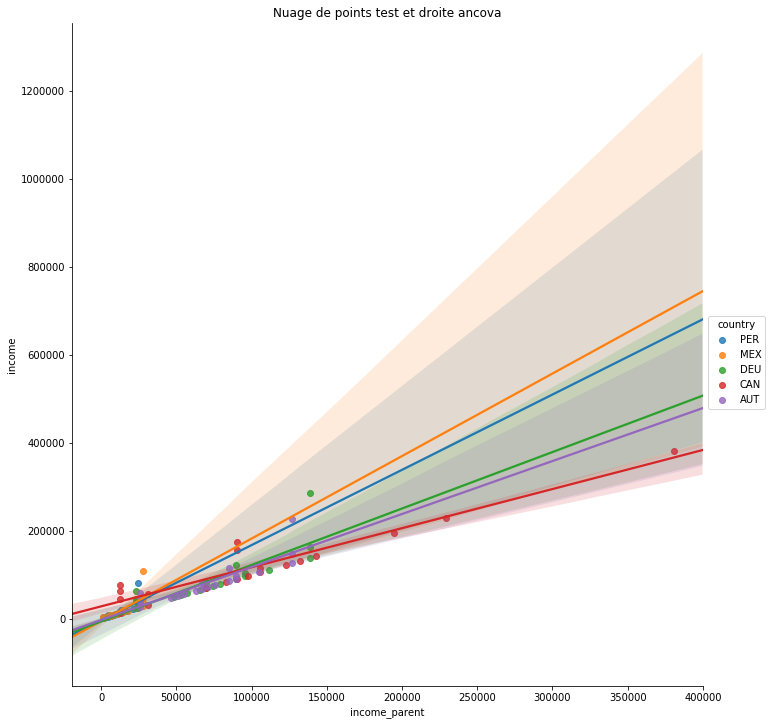

In [172]:
#fig = plt.figure()
fig = sns.lmplot('income_parent', 'income', data=donnees_20_qtiles, hue='country', fit_reg=True,size=10)
plt.title('Nuage de points test et droite ancova')
fig.savefig('../presentation/images/ancova_pays__income_parent_income')

In [135]:
var_expl_model_2 = round(lm.rsquared,2)

<a id='reg1'></a>

## Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le revenu salaire moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?

### StatsModels

In [145]:
y = donnees_20_qtiles['income']
X = donnees_20_qtiles[['salaire_moyen_pays_2008','indice_gini']]
X = sm.add_constant(X, prepend=False)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
result = sm.OLS(y_train, X_train).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a1,a2,b = result.params[0],result.params[1],result.params[2]

In [148]:
result.params

salaire_moyen_pays_2008         0.582996
indice_gini                 -2327.878032
const                      119017.328050
dtype: float64

In [149]:
print('Coefficients: \n', a1,a2,b)

Coefficients: 
 0.5829957084775759 -2327.8780324051577 119017.32805011838


In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     17.07
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           1.15e-06
Time:                        15:11:40   Log-Likelihood:                -827.47
No. Observations:                  67   AIC:                             1661.
Df Residuals:                      64   BIC:                             1668.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
salaire_moyen_pays_2008     0.5830      0.410      1.421      0.160      -0.237       1.403
indice_gini             -2327.8780   2136.425     -1.090      0.280   -6595.877    1940.121
const                     1.19e+05   1.08e+05      1.099      0.276   -9.73e+04    3.35e+05
==============================================================================
Omnibus:                       55.880   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.909
Skew:                           2.463   Prob(JB):                     4.05e-59
Kurtosis:                      11.489   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
y_predits = result.predict(X_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


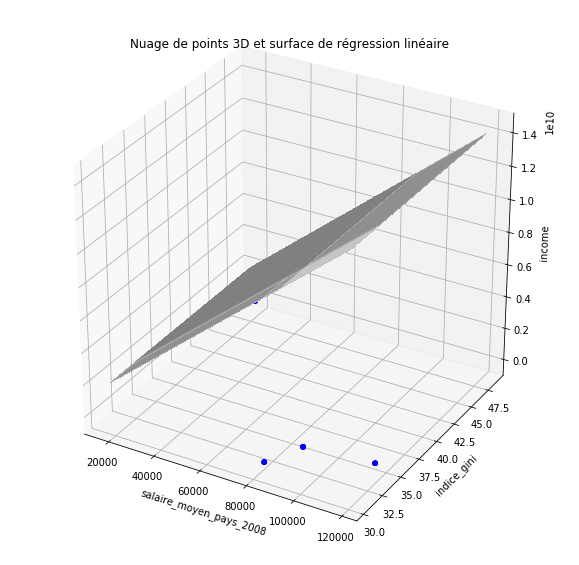

In [152]:
# Affichage des graphiques

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = X_test['salaire_moyen_pays_2008']               # generate a mesh
y_surf = X_test['indice_gini']
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'salaire_moyen_pays_2008': x_surf.ravel(), 'indice_gini': y_surf.ravel()})

exog = sm.add_constant(exog)
out = result.predict(exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='white',
                alpha = 0.4)

ax.scatter(X_test['salaire_moyen_pays_2008'], X_test['indice_gini'], y_test,
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('salaire_moyen_pays_2008')
ax.set_ylabel('indice_gini')
ax.set_zlabel('income')

ax.set_title('Nuage de points 3D et surface de régression linéaire')

fig.savefig('../presentation/images/reg_lin_indice_gini_sal_moy_income')

plt.show()

In [153]:
var_expl_model_3 = round(result.rsquared,2)

### Scikit Learn 

In [109]:
# Création de l'objet Régression linéaire
regr = linear_model.LinearRegression()

# Modélisation à partir des données d'entrainement
regr.fit(X_train, y_train)

# Prédiction des Y en fonction des X de test
Y_predits = regr.predict(X_test)


# Affichage des coefficients
print('Coefficients: \n', 'a1 = ',regr.coef_[0],'a2 = ',regr.coef_[1],'b = ',regr.intercept_)
# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Y_predits))
# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(y_test, Y_predits))



Coefficients: 
 a1 =  0.5829957084775753 a2 =  -2327.8780324051604 b =  119017.3280501184
Mean squared error: 1428132520.87
Variance score: 0.50


<a id='reg2'></a>

## Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?

### StatsModels

In [154]:
y = donnees_20_qtiles['income']
X = donnees_20_qtiles[['salaire_moyen_pays_2008','indice_gini','income_parent']]
X = sm.add_constant(X, prepend=False)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [156]:
result = sm.OLS(y_train, X_train).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a1,a2,a3,b = result.params[0],result.params[1],result.params[2],result.params[3]

In [157]:
result.params

salaire_moyen_pays_2008       -0.002066
indice_gini                 -719.367144
income_parent                  0.990885
const                      38973.067973
dtype: float64

In [158]:
print('Coefficients: \n a1 = {}, a2= {}, a3= {}, b= {}'.format(a1,a2,a3,b))

Coefficients: 
 a1 = -0.0020660002148053525, a2= -719.367143922429, a3= 0.9908854829826467, b= 38973.067972567245


In [159]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           5.50e-29
Time:                        15:11:50   Log-Likelihood:                -770.68
No. Observations:                  67   AIC:                             1549.
Df Residuals:                      63   BIC:                             1558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
salaire_moyen_pays_2008    -0.0021      0.181     -0.011      0.991      -0.363       0.359
indice_gini              -719.3671    927.543     -0.776      0.441   -2572.914    1134.180
income_parent               0.9909      0.059     16.740      0.000       0.873       1.109
const                    3.897e+04    4.7e+04      0.829      0.410    -5.5e+04    1.33e+05
==============================================================================
Omnibus:                       78.113   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.846
Skew:                           3.494   Prob(JB):                    8.80e-154
Kurtosis:                      17.271   Cond. No.                     1.70e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Affichage des prédictions 

In [160]:
y_predits = result.predict(X_test)
X_test_with_pred = X_test.copy()
X_test_with_pred['revenus_predits'] = y_predits
resultats = pd.merge(X_test_with_pred, donnees_20_qtiles, left_index = True, right_index = True)
resultats = resultats[['revenus_predits','country_name','income_parent_y','quantile_parent','indice_gini_y']]
resultats['evolution_revenu'] = resultats['revenus_predits'] / resultats['income_parent_y'] * 100 - 100

In [161]:
resultats.sort_values(by='evolution_revenu',ascending=False)

,revenus_predits,country_name,income_parent_y,quantile_parent,indice_gini_y,evolution_revenu
22,5527.345357,Mexico,1301.356604,1,48.23,324.737181
0,5756.191288,Peru,1686.235070,1,48.45,241.363514
4,8784.257152,Peru,4742.154160,3,48.45,85.237697
83,42278.059247,Austria,25615.056100,1,30.45,65.051597
80,42278.059247,Austria,25615.056100,1,30.45,65.051597
40,38019.287532,Germany,23393.752100,1,33.29,62.518981
42,38019.287532,Germany,23393.752100,1,33.29,62.518981
26,11589.601961,Mexico,7419.376000,5,48.23,56.207233
9,14714.016061,Peru,10726.457100,11,48.45,37.174986
11,15942.051256,Peru,11965.788200,14,48.45,33.230264


### Scikit Learn 

In [118]:
# Création de l'objet Régression linéaire
regr = linear_model.LinearRegression()

# Modélisation à partir des données d'entrainement
regr.fit(X_train, y_train)

# Prédiction des Y en fonction des X de test
Y_predits = regr.predict(X_test)


# Affichage des coefficients
print('Coefficients: \n', 'a1 = {} ,a2 = {}, a3= {} ,b = {}'.format(regr.coef_[0],regr.coef_[1],regr.coef_[2],regr.intercept_))
# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: {} ".format(mean_squared_error(y_test, Y_predits)))
# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: {} '.format(r2_score(y_test, Y_predits)))



Coefficients: 
 a1 = -0.0020660002149791626 ,a2 = -719.3671439224158, a3= 0.9908854829826623 ,b = 38973.06797257108
Mean squared error: 513538876.6599982 
Variance score: 0.8197104897447594 


## Toujours selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :

    Le pays de naissance (ie. Le revenu moyen et l’indice de Gini)
    Le revenu des parents
    D’autres facteurs (efforts, chance, etc.)


In [119]:
print("le  modèle  explique  près de {}%  de  la variabilité de la variable cible".format(round(result.rsquared*100,2)))

le  modèle  explique  près de 88.03%  de  la variabilité de la variable cible


In [120]:
ssr = sm.regression.linear_model.RegressionResults.ssr(result)

In [121]:
ssm = sm.regression.linear_model.RegressionResults.ess(result)

In [122]:
tss = sm.regression.linear_model.RegressionResults.centered_tss(result)

Vérification : SCE / SCT = R-Squared ? 

In [123]:
if round(ssm/tss,2) == round(result.rsquared,2):
    print(True)
else:
    print(False)

True


A un seuil de signification de 0.05 : La variable significative (p < 0.05) est le revenu des parents 0
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Regression_Lasso_Python.pdf

**Decomposition de la variance expliquée par les variables.**

_Variance expliquée par le pays de naissance_

In [163]:
var_expl_model_3

0.35

_Variance expliquée par le revenu des parents_

In [162]:
var_expl_rev_par = round(result.rsquared,2) - var_expl_model_3
var_expl_rev_par

0.53

_Variance expliquée par d'autres facteurs_

In [169]:
1 - round(result.rsquared,2)

0.12

## En observant le coefficient associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?

In [124]:
print("Si l'indice de Gini varie de 0.1 (plus d'inégalité), le revenu de l'enfant va varier en moyenne de {}.".format(regr.coef_[1]))

Si l'indice de Gini varie de 0.1 (plus d'inégalité), le revenu de l'enfant va varier en moyenne de -719.3671439224158.
